In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

**Loading the Dataset**

In [3]:
df = pd.read_csv("smart_city_n_dataset.csv")
df.head()



,City,Year,IoT_Devices,AI_Usage_Score,Crime_Rate,AQI,Green_Cover_%,Emergency_Response_Time,Public_Safety_Satisfaction_Score,Smart_Policy_Status
0,22,2023,0.898992,0.687270,0.439270,0.448259,0.396781,0.555939,0.705192,1
1,21,2011,0.597833,0.975357,0.156695,0.263403,0.793341,0.315877,0.756891,1
2,16,2016,0.755554,0.865997,0.363954,0.312133,0.535242,0.298932,0.739473,1
3,2,2009,0.483360,0.799329,0.492273,0.615339,0.542047,0.472893,0.156239,0
4,17,2010,0.681267,0.578009,0.719023,0.514895,0.411104,0.650673,0.100273,0


**EDA**

Columns: Index(['City', 'Year', 'IoT_Devices', 'AI_Usage_Score', 'Crime_Rate', 'AQI',
       'Green_Cover_%', 'Emergency_Response_Time',
       'Public_Safety_Satisfaction_Score', 'Smart_Policy_Status'],
      dtype='object')
Shape: (23848, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23848 entries, 0 to 23847
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   City                              23848 non-null  int64  
 1   Year                              23848 non-null  int64  
 2   IoT_Devices                       23848 non-null  float64
 3   AI_Usage_Score                    23848 non-null  float64
 4   Crime_Rate                        23848 non-null  float64
 5   AQI                               23848 non-null  float64
 6   Green_Cover_%                     23848 non-null  float64
 7   Emergency_Response_Time           23848 non-null  float64
 8   Public_Safe

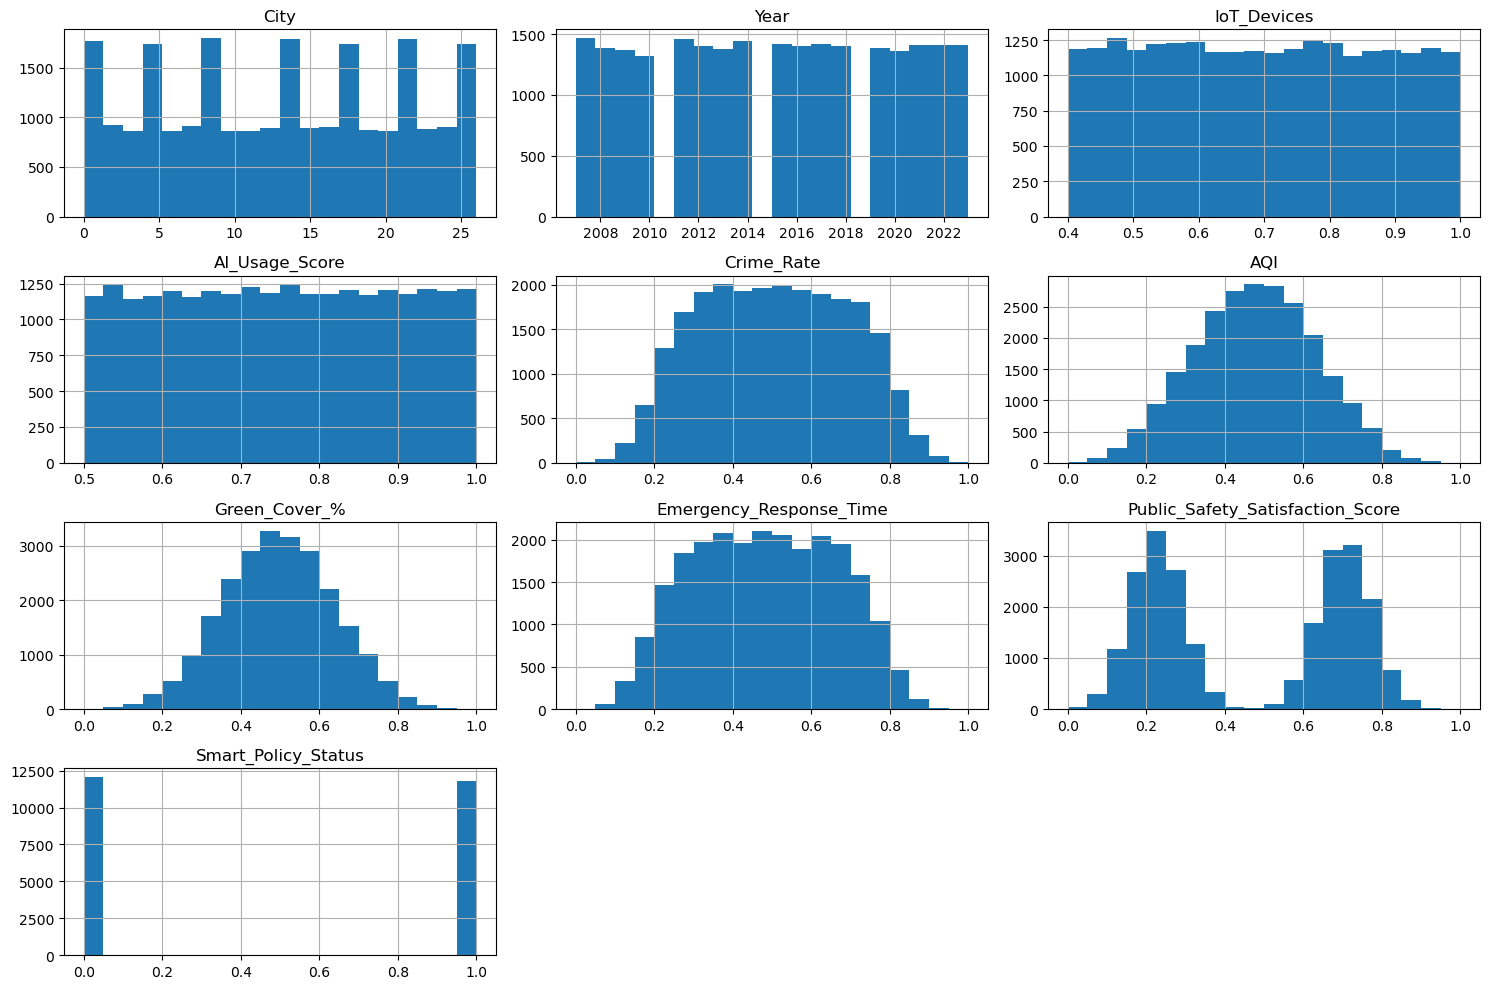

In [4]:
# EDA
print("Columns:", df.columns)
print("Shape:", df.shape)
df.info()
df.describe()
df.isnull().sum()
df.sample(5)
df.hist(bins=20, figsize=(15, 10))
import matplotlib.pyplot as plt
plt.tight_layout()
plt.show()


**Preprocessing**

In [5]:
# Simple preprocessing example
df = df.dropna()  # or fillna() as needed
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols)


In [6]:
print("Columns:\n", df.columns.tolist())
print(df.head(3))


Columns:
 ['City', 'Year', 'IoT_Devices', 'AI_Usage_Score', 'Crime_Rate', 'AQI', 'Green_Cover_%', 'Emergency_Response_Time', 'Public_Safety_Satisfaction_Score', 'Smart_Policy_Status']
   City  Year  IoT_Devices  AI_Usage_Score  Crime_Rate       AQI  \
0    22  2023     0.898992        0.687270    0.439270  0.448259   
1    21  2011     0.597833        0.975357    0.156695  0.263403   
2    16  2016     0.755554        0.865997    0.363954  0.312133   

   Green_Cover_%  Emergency_Response_Time  Public_Safety_Satisfaction_Score  \
0       0.396781                 0.555939                          0.705192   
1       0.793341                 0.315877                          0.756891   
2       0.535242                 0.298932                          0.739473   

   Smart_Policy_Status  
0                    1  
1                    1  
2                    1  


In [7]:
print("All columns:\n", list(df.columns))
print("\nFirst few rows:")
display(df.head())


All columns:
 ['City', 'Year', 'IoT_Devices', 'AI_Usage_Score', 'Crime_Rate', 'AQI', 'Green_Cover_%', 'Emergency_Response_Time', 'Public_Safety_Satisfaction_Score', 'Smart_Policy_Status']

First few rows:


,City,Year,IoT_Devices,AI_Usage_Score,Crime_Rate,AQI,Green_Cover_%,Emergency_Response_Time,Public_Safety_Satisfaction_Score,Smart_Policy_Status
0,22,2023,0.898992,0.687270,0.439270,0.448259,0.396781,0.555939,0.705192,1
1,21,2011,0.597833,0.975357,0.156695,0.263403,0.793341,0.315877,0.756891,1
2,16,2016,0.755554,0.865997,0.363954,0.312133,0.535242,0.298932,0.739473,1
3,2,2009,0.483360,0.799329,0.492273,0.615339,0.542047,0.472893,0.156239,0
4,17,2010,0.681267,0.578009,0.719023,0.514895,0.411104,0.650673,0.100273,0


**Selecting Features (X) and Target (y)**

In [8]:
target_col = 'Smart_Policy_Status'
print("Using target column:", target_col)

# Features are all columns except target and City (non-numeric)
X = df.drop(columns=[target_col, 'City'])  
y = df[target_col]

# Keep only numeric features
X = X.select_dtypes(include='number')

print("Feature columns used:", X.columns.tolist())


Using target column: Smart_Policy_Status
Feature columns used: ['Year', 'IoT_Devices', 'AI_Usage_Score', 'Crime_Rate', 'AQI', 'Green_Cover_%', 'Emergency_Response_Time', 'Public_Safety_Satisfaction_Score']


 **Train–Test Split (Creating Training and Testing Sets)**

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (19078, 8) Test shape: (4770, 8)


**Model Training using Random Forest**

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Model Evaluation**

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2431
           1       1.00      1.00      1.00      2339

    accuracy                           1.00      4770
   macro avg       1.00      1.00      1.00      4770
weighted avg       1.00      1.00      1.00      4770



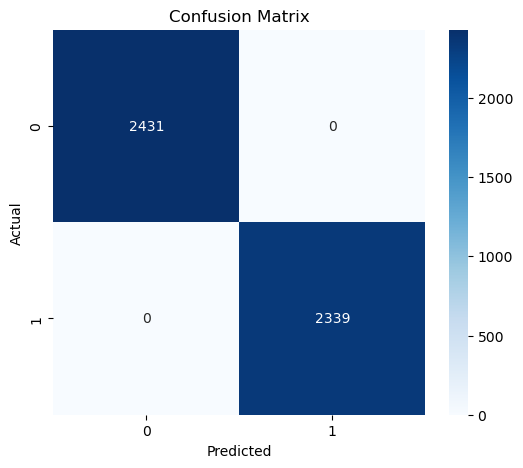

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Feature Importance Visualization**

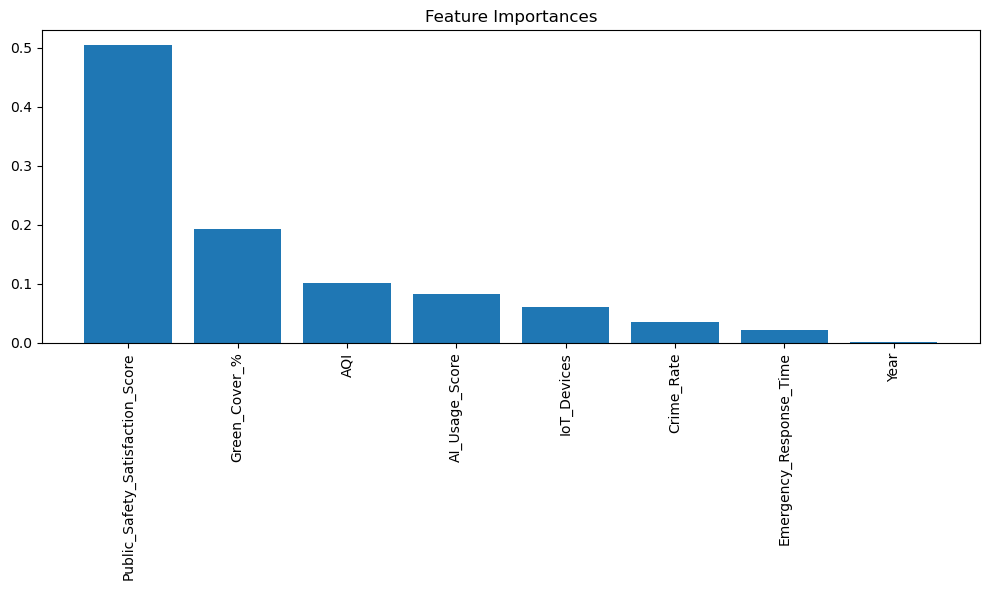

In [12]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
feat_names = X.columns[indices]

plt.figure(figsize=(10,6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feat_names, rotation=90)
plt.tight_layout()
plt.show()


**Saving the Trained Model (Model Checkpoint)**

In [13]:
import joblib
import os

# Create folder to store model
os.makedirs("models", exist_ok=True)

# Save trained model file
joblib.dump(model, "models/random_forest_model.joblib")

print("Model saved successfully as: models/random_forest_model.joblib")


Model saved successfully as: models/random_forest_model.joblib
